# 1. Generate Bar Charts for Word Counts

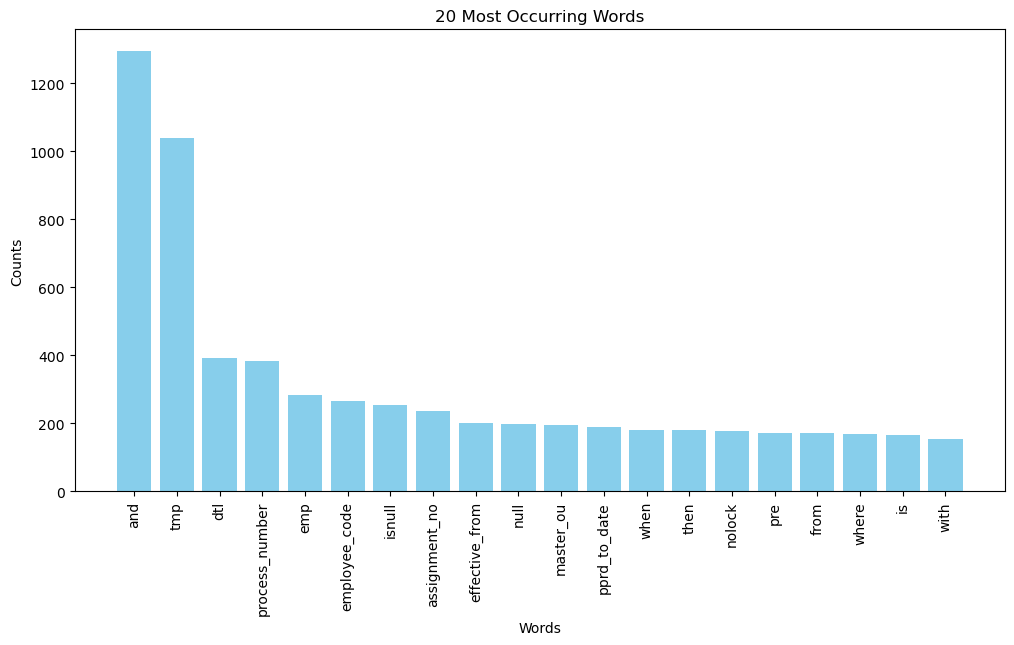

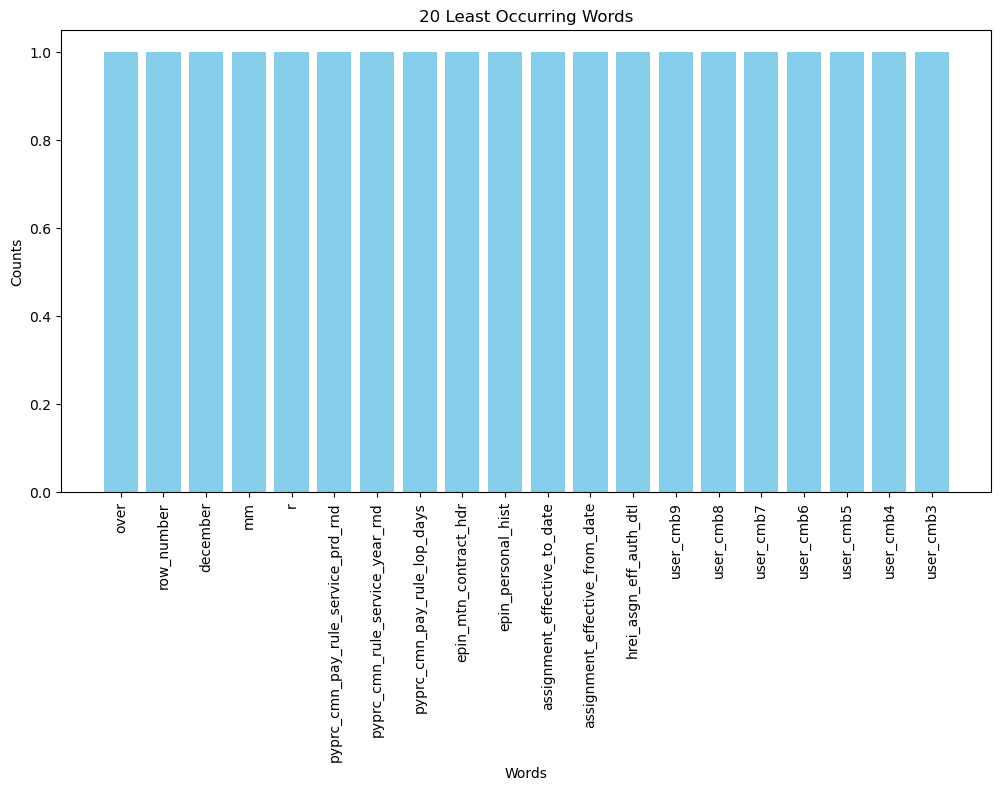

In [2]:
import re
from collections import Counter
import matplotlib.pyplot as plt

def read_sql_file(filepath):
    with open(filepath, 'r') as file:
        return file.read()

def tokenize_sql(sql_content):
    sql_content = re.sub(r'--.*?(\n|$)|/\*.*?\*/', ' ', sql_content, flags=re.S)
    words = re.findall(r'\b\w+\b', sql_content.lower())
    return words

sql_content1 = read_sql_file('data/pyprc_cmn_pay_rule_proration_method.sql')
sql_content2 = read_sql_file('data/pyprc_hcl_aws_cmn_pay_rule_emp_fetch.sql')

words1 = tokenize_sql(sql_content1)
words2 = tokenize_sql(sql_content2)

combined_words = words1 + words2
word_counts = Counter(combined_words)

filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 2}

most_common_20 = dict(word_counts.most_common(20))
least_common_20 = dict(word_counts.most_common()[:-21:-1])

def plot_word_counts(word_counts, title):
    plt.figure(figsize=(12, 6))
    plt.bar(word_counts.keys(), word_counts.values(), color='skyblue')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()

plot_word_counts(most_common_20, '20 Most Occurring Words')
plot_word_counts(least_common_20, '20 Least Occurring Words')


# 2. Extract Comments, Variables, Return Values, and Table Names

In [3]:
def extract_comments(sql_content):
    comments = re.findall(r'--.*?$|/\*.*?\*/', sql_content, re.S | re.M)
    return comments

def extract_variables_and_returns(sql_content):
    variables = re.findall(r'@\w+', sql_content)
    return_values = re.findall(r'RETURN\s+@\w+', sql_content, re.I)
    return variables, return_values

def extract_table_names(sql_content):
    table_names = re.findall(r'\bFROM\s+(\w+)|\bJOIN\s+(\w+)', sql_content, re.I)
    table_names = [name for name_pair in table_names for name in name_pair if name]
    return list(set(table_names))

comments1 = extract_comments(sql_content1)
comments2 = extract_comments(sql_content2)

variables1, return_values1 = extract_variables_and_returns(sql_content1)
variables2, return_values2 = extract_variables_and_returns(sql_content2)

table_names1 = extract_table_names(sql_content1)
table_names2 = extract_table_names(sql_content2)

comments = comments1 + comments2
variables = list(set(variables1 + variables2))
return_values = list(set(return_values1 + return_values2))
table_names = list(set(table_names1 + table_names2))

print("Comments:", comments)


Comments: ['/**********************************************************************************************/', '/* procedure      pyprc_cmn_pay_rule_proration_method                                         */', "/* description    To compute employee's salary based on proration method       */", '/*                                                                                            */', '/**********************************************************************************************/', '/* project        NGP                                                                         */', '/* version        1 0 00                                                                      */', '/* rule version   1 0 00                                                                      */', '/**********************************************************************************************/', '/* referenced  epin_employee, tmscd_emp_rota_schd_map, tmscd_attENDance_param,    */', '/* tables/views

In [4]:
print("Variables:", variables)

Variables: ['@pydef_ou', '@getdate', '@pprd_to_date', '@tmgif_ou', '@erate_ou', '@called_for', '@arrears_mode', '@payroll_ou_cd', '@mul_legal_entity_dyn_sv', '@comcode', '@pprd_FROM_date', '@prcprd_cd', '@pay_elt_cd', '@pay_frequency', '@empin_ou', '@emp_cd', '@process_number', '@pay_cal_code', '@count_ou', '@payroll_calendar_code', '@CTC_tmp', '@arrears_set_cd', '@assn_no', '@login_language', '@exratetype', '@wrk_tmp', '@tmgt_interface', '@emp_process_tmp', '@lvdef_ou', '@pyelt_ou', '@payroll_type', '@pprd_from_date', '@rule_type', '@stdhrs_per_day', '@paySET_cd', '@exchange_date', '@syspr_ou', '@week_begins', '@payset_cd', '@amount', '@gre_cal_tmp', '@pyset_ou', '@sys_param_lopctc', '@lv_interface', '@payset_currency', '@payroll_cd', '@empmvou', '@progressive_date_tmp', '@system_param_value', '@cal_days', '@empng_ou', '@progressive_flag', '@std_amount']


In [5]:
print("Return Values:", return_values)

Return Values: []


In [6]:
print("Table Names:", table_names)

Table Names: ['fbp_setfn_eratetype_wrap_vw', 'hrpydef_pyrl_def_hdr', 'below', 'pyprc_cmn_rule_config_dtl', 'tmscd_emp_gre_calendar', 'erate_exrate_mst', 'interim', 'pyprc_cmn_ctc_rule_week_begins', 'hrpyars_arrears_prc_cnt', 'falls', 'hrcompn_empflexibenft_auth_brkup', 'pyprc_cmn_ctc_rule_gre_cal_tmp', 'hrcmn_company_ou_map_view', 'hrcompn_flexibenft_auth_brkupvw', 'hrpyprc_payset_ready_cnt', 'tmgif_LOP_pay_ded_elt_map', 'epin_employee', 'pyprc_cmn_ctc_rule_emp_gre_cal', 'hrmv_emp_rehire_dtl', 'hrpyprc_pyrol_process_cnt', 'tmscd_emp_rota_schd_map', 'pyprc_pre_payroll', 'hrcompn_empflexibenft_auth_oca', 'pyprc_cmn_ctc_rule_comp_tmp', 'hrpyelt_accm_elt_dtl', 'hrcmn_cim_view', 'pyprc_cmn_ctc_rule_wrk_tmp', 'pyprc_cmn_ctc_lop_dtl_tmp', 'hrpyprc_emp_pyrol_pe_tmp', 'pyprc_cmn_hour_conv_freq_tmp', 'hrpyset_payset_hdr', 'hrpydef_pyrl_parameter_vw', 'pyprc_cmn_rule_emp_info', 'ldef_leave_parameters', 'pyprc_cmn_rule_emp_process_tmp', 'tmgif_shift_dtl', 'employees', 'hrcompn_empflexibenft_auth_o

# 3. Extract Mathematical Formulae and Variables

In [3]:
def extract_mathematical_formulae(sql_content):
    formulae = re.findall(r'[\w@]+\s*[\+\-\*/%]\s*[\w@]+', sql_content)
    return formulae

formulae1 = extract_mathematical_formulae(sql_content1)
formulae2 = extract_mathematical_formulae(sql_content2)

formulae = list(set(formulae1 + formulae2))

print("Mathematical Formulae:", formulae)


Mathematical Formulae: ['HRPS-7395', '12-Oct', '@pprd_to_date+5', '06-Mar', '25-Oct', '30-July', '04-Jun', 'COH-134', '30-mar', 'GHKH-57', '25-Feb', 'paid_wrking_days * per_day_sal', '18-Oct', 'RULE -SA0004', 'emp_service_in_mth_cap - CONVERT', 'Mar-25', '08-July', 'NMIH-225', 'PE-LOP', '24-Mar', '31-May', '@pprd_FROM_date-5', 'HRP-3338', '09-Sep', 'COH-121', '18-Nov', 'flag - LOP', 'RPFF-30', 'regular_hours/60', 'SNPL-358', 'Changes - Defect', '04-Sep', 'HC-2430', 'HKH-4329', 'SMH-135', '03-Apr', '12-Mar', '15-Mar', 'HRP-208', '22-May', 'schedule_date+hdr', '21-Jan', '18-Dec', '@pprd_FROM_date-2', 'SGIH-137', 'HC-3312', '26-Oct', '10-Mar', 'sch_hrs-isnull', '02-Aug', '31-July', 'hour_conv_freq_tmp   - pyprc_cmn_hour_conv_freq_tmp', 'HBM-752', '10-Jan', '27-Jul', '09-Aug', 'HST-6038', 'RULE -SA0033', 'HRPS-4125', 'HST-5201', 'emp_gre_cal    - pyprc_cmn_ctc_rule_emp_gre_cal', 'HRP-2269', '13-Dec', 'MCIH-435', 'SGIH-1325', '17-Oct', '@pprd_to_date+2', '18-Jan', 'HST-5715', '18-Apr', 'RUL

# 4. Extracting Nesting Levels [Unique Insight]

By analyzing the maximum nesting level of SQL statements within each stored procedure, we gain insight into the complexity and maintainability of the code. Higher nesting levels can indicate more complex logic, which might be harder to debug and maintain.

Maximum Nesting Level in SP1: 256
Maximum Nesting Level in SP2: 85


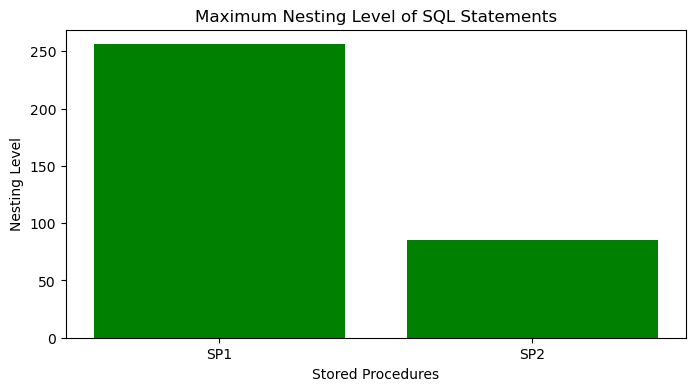

In [4]:
import re

def find_max_nesting_level(sql_content):
    nesting_keywords = ['SELECT', 'INSERT', 'UPDATE', 'DELETE', 'IF', 'WHILE', 'CASE', 'BEGIN', 'END']
    tokens = re.findall(r'\b(?:' + '|'.join(nesting_keywords) + r')\b', sql_content, re.I)
    
    max_depth = 0
    current_depth = 0

    for token in tokens:
        if token.upper() in ['SELECT', 'INSERT', 'UPDATE', 'DELETE', 'IF', 'WHILE', 'CASE', 'BEGIN']:
            current_depth += 1
            if current_depth > max_depth:
                max_depth = current_depth
        elif token.upper() == 'END':
            current_depth -= 1
    
    return max_depth

max_nesting_level1 = find_max_nesting_level(sql_content1)
max_nesting_level2 = find_max_nesting_level(sql_content2)

print(f"Maximum Nesting Level in SP1: {max_nesting_level1}")
print(f"Maximum Nesting Level in SP2: {max_nesting_level2}")

nesting_levels = {
    'SP1': max_nesting_level1,
    'SP2': max_nesting_level2
}

plt.figure(figsize=(8, 4))
plt.bar(nesting_levels.keys(), nesting_levels.values(), color='green')
plt.title('Maximum Nesting Level of SQL Statements')
plt.xlabel('Stored Procedures')
plt.ylabel('Nesting Level')
plt.show()
